# Исследование возможностей увеличения выручки интернет-магазина

Отдел маркетинга крупного интернет-магазина подготовил список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

# Часть 1. Приоритизация гипотез

Сперва загрузим необходимые для анализа библиотеки.

In [1]:
# загружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Затем считаем csv-файл с оценками параметров гипотетических решений.

In [2]:
# считываем csv-файл с гипотезами
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Применим фреймворк ICE для приоритизации гипотез.

In [3]:
# рассчитываем значение ICE для представленных гипотез и сортируем их по убыванию приоритета
hypothesis['ICE'] = hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']

hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


Наиболее приоритетными в таком случае оказываются гипотезы под номерами 8, 0 и 7.  

Теперь применим фреймворк RICE для приоритизации гипотез.

In [4]:
# рассчитываем значение RICE для представленных гипотез и сортируем их по убыванию приоритета
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']

hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


ТОП гипотез изменился - на первое место переместилась гипотеза под номером 7, на втором месте оказалась гипотеза номер 2, третье и четвертое место делят гипотезы 0 и 6.

Такое изменение произошло из-за того, что гипотезы 7 и 2 обладают высокими оценками параметра охвата, ввиду универсальности предлагаемых решений, что делает их более приоритетными по методу RICE, учитывающему параметр Reach.

# Часть 2. Анализ A/B-теста

Для начала считаем csv-файлы с данными о заказах и количестве пользователей.

In [5]:
# считываем csv-файл с заказами
orders = pd.read_csv('/datasets/orders.csv')

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
# считываем csv-файл с числом пользователей
visitors = pd.read_csv('/datasets/visitors.csv')

visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Перед более детальным исследованием данных выявим уникальных пользователей из таблицы заказов, попавших в обе группы - А и В.

In [7]:
# разделяем пользователей по группам
orders_a = orders[orders['group']=='A']['visitorId'].unique()
orders_b = orders[orders['group']=='B']['visitorId'].unique()

# находим повторяющихся пользователей
double_users = [x for x in orders_a if x in orders_b]

len(double_users)

58

Нашлось 58 повторов, предлагается исключить их из последующего анализа.

In [8]:
# убираем повторяющихся пользователей
orders = orders[~orders['visitorId'].isin(double_users)]

В целях дальнейшей агрегации данных подготовим массив уникальных пар значений дат и групп теста.

In [9]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates() 

dates_groups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Соберем агрегированные кумулятивные по дням данные о заказах, применив к созданному массиву лямбда-функцию, выбирающую максимальную дату, группу теста, количество уникальных заказов и покупателей для срезов данных о заказах по каждую дату включительно. 

In [10]:
# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

orders_aggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Применим аналогичную логику для получения агрегированных кумулятивных по дням данных о количестве посетителей сайта.

In [11]:
# получаем агрегированные кумулятивные по дням данные о числе пользователей
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим полученные данные в одной таблице на основе даты и группы теста.

In [12]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Разделим объединенные данные по двум группам теста и построим график кумулятивной выручки по этим группам.

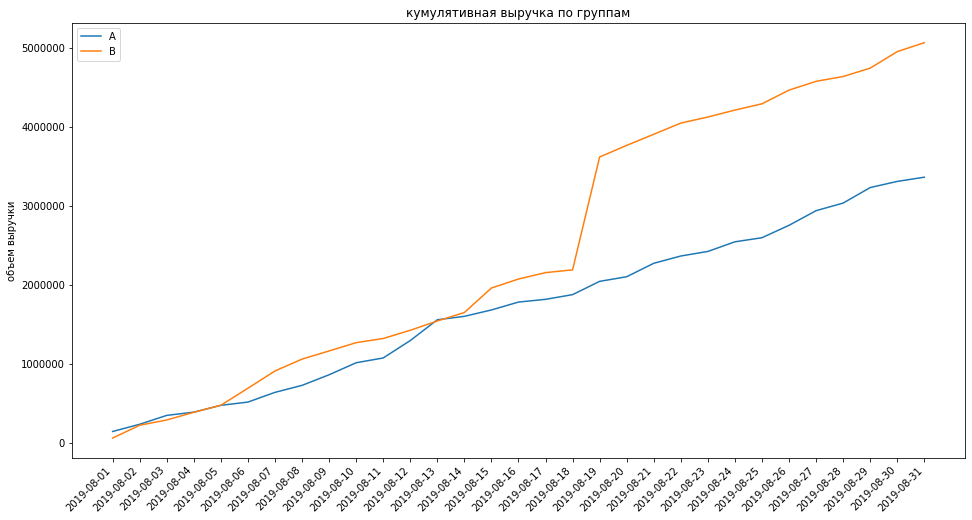

In [13]:
# разделяем кумулятивные данные по группам А и B
cumulative_data_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders', 'buyers', 'visitors']]
cumulative_data_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders', 'buyers', 'visitors']]

# строим график кумулятивной выручки
plt.figure(figsize=(16,8))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45, ha="right")
plt.plot(cumulative_data_a['date'], cumulative_data_a['revenue'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['revenue'], label='B')
plt.title('кумулятивная выручка по группам')
plt.ylabel('объем выручки')
plt.legend() 
plt.show()

В группе B накопленные значения выручки в целом выше, чем в группе А, однако в районе 19-го числа наблюдается резкий скачок в графике B, что может указывать на выбросы/аномалии в данных. 

Используя те же данные, построим график кумулятивного среднего чека по группам.

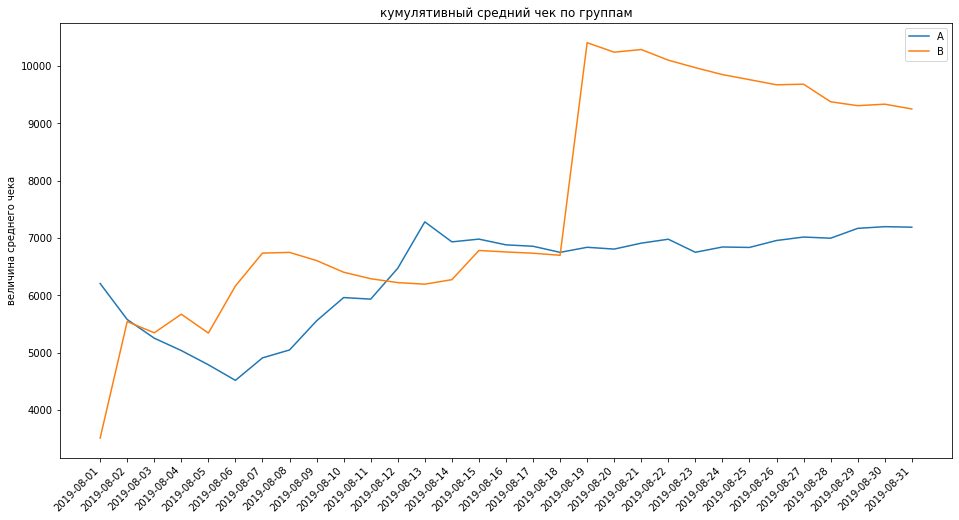

In [14]:
# строим график кумулятивного среднего чека
plt.figure(figsize=(16,8))
plt.xticks(rotation=45, ha="right")
plt.plot(cumulative_data_a['date'], cumulative_data_a['revenue']/cumulative_data_a['orders'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['revenue']/cumulative_data_b['orders'], label='B')
plt.title('кумулятивный средний чек по группам')
plt.ylabel('величина среднего чека')
plt.legend() 
plt.show()

И снова показатели группы B оказываются значительно выше показателей группы А во второй половине эксперимента из-за резкого всплеска, наблюдаемого на графике. 

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

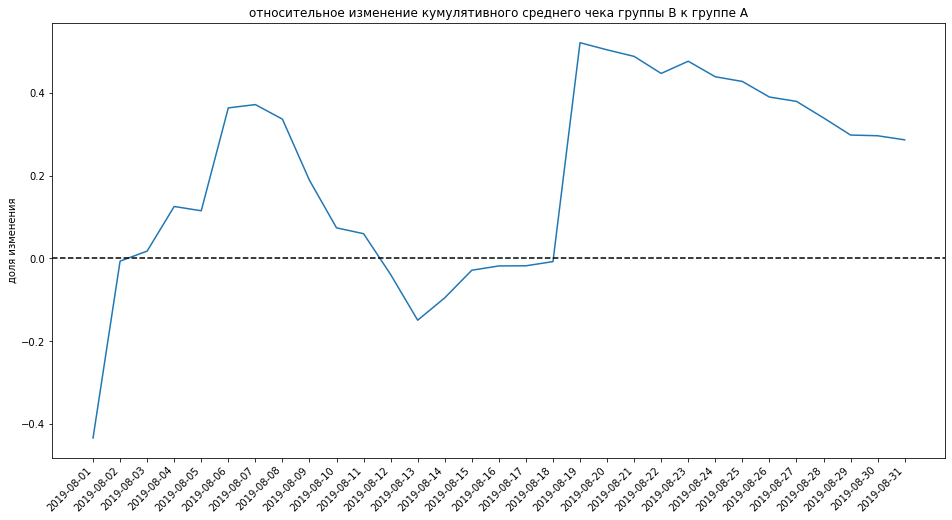

In [15]:
# собираем данные в одном датафрейме
cumulative_data_merged = cumulative_data_a.merge(cumulative_data_b, on='date', suffixes=['A', 'B'])

# строим отношение средних чеков
plt.figure(figsize=(16,8))
plt.xticks(rotation=45, ha="right")
plt.plot(cumulative_data_merged['date'], (cumulative_data_merged['revenueB']/cumulative_data_merged['ordersB'])/(cumulative_data_merged['revenueA']/cumulative_data_merged['ordersA']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('относительное изменение кумулятивного среднего чека группы B к группе A')
plt.ylabel('доля изменения')
plt.show()

График почти всегда выше нулевой отметки, однако опять же отмечаются резкие взлеты/падения и в целом пока еще нельзя сказать, что график стабилизировался.

Теперь построим график кумулятивной конверсии по группам.

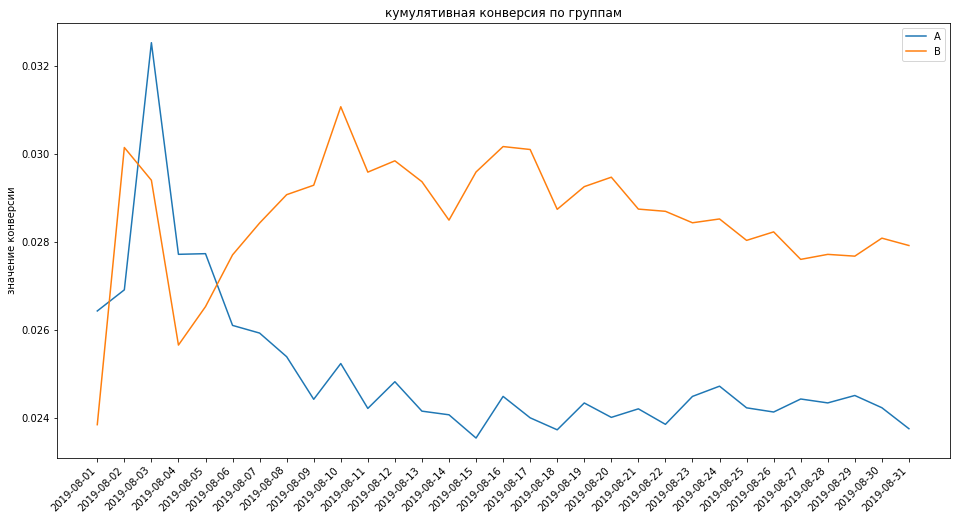

In [16]:
# строим график кумулятивной конверсии
plt.figure(figsize=(16,8))
plt.xticks(rotation=45, ha="right")
plt.plot(cumulative_data_a['date'], cumulative_data_a['buyers']/cumulative_data_a['visitors'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['buyers']/cumulative_data_b['visitors'], label='B')
plt.title('кумулятивная конверсия по группам')
plt.ylabel('значение конверсии')
plt.legend() 
plt.show()

Графики показывают явный разрыв, но также нельзя уверенно сказать, что значения зафиксировались.

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

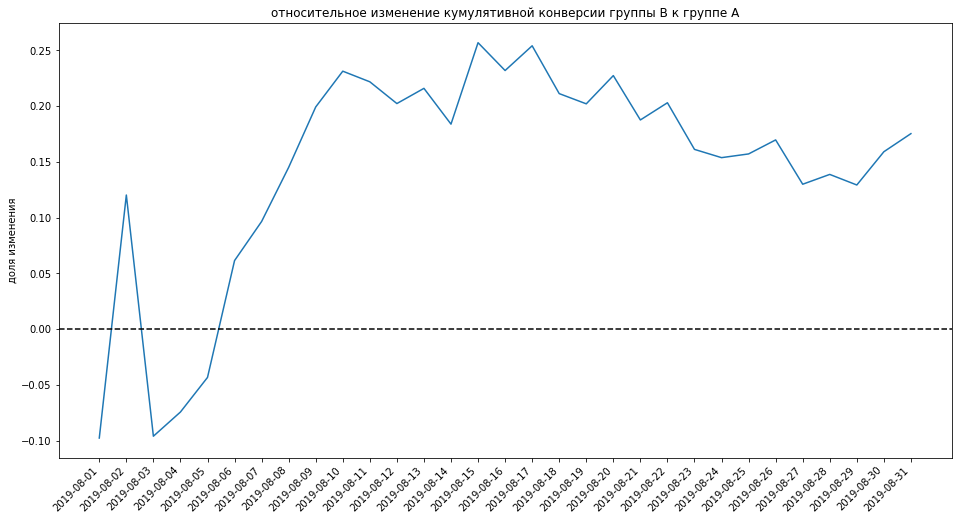

In [17]:
# строим отношение конверсий
plt.figure(figsize=(16,8))
plt.xticks(rotation=45, ha="right")
plt.plot(cumulative_data_merged['date'], (cumulative_data_merged['buyersB']/cumulative_data_merged['visitorsB'])/(cumulative_data_merged['buyersA']/cumulative_data_merged['visitorsA']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('относительное изменение кумулятивной конверсии группы B к группе A')
plt.ylabel('доля изменения')
plt.show()

В целом график подтверждает вышеописанные наблюдения. Пора проверить данные на аномалии и выбросы.

Сперва посчитаем количество заказов по пользователям.

In [18]:
# группируем количество заказов по пользователям
orders_by_users = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})

orders_by_users.sort_values(by='transactionId', ascending=False)

,visitorId,transactionId
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


Построим точечный график количества заказов по пользователям.

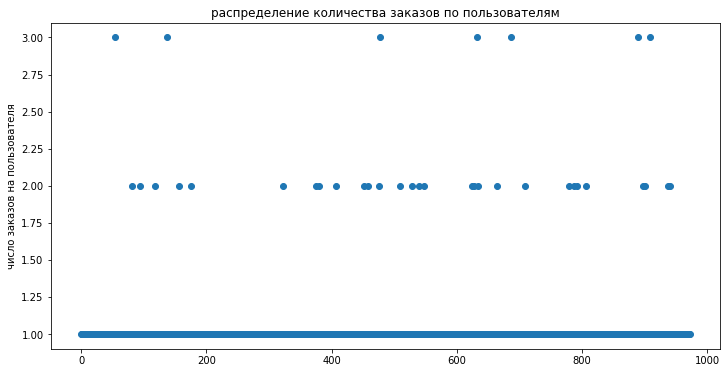

In [19]:
# определяем диапазон данных по оси x
x_values = pd.Series(range(0,len(orders_by_users)))

# строим точечную диаграмму числа заказов на одного пользователя
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders_by_users['transactionId'])
plt.title('распределение количества заказов по пользователям')
plt.ylabel('число заказов на пользователя')
plt.show()

Большинство пользователей совершают только один заказ, реже - два.

Посмотрим также на перцентили количества заказов на пользователя.

In [20]:
# считаем 95-й и 99-й перцентили количества заказов на пользователя
np.percentile(orders_by_users['transactionId'], [95, 99])

array([1., 2.])

Учитывая, что наличие более 2-х заказов у одного пользователя наблюдается только в разовых случаях, можно выбрать это число в качестве границы отсева значений при очистке данных.

Аналогичным образом построим точечный график стоимостей заказов.

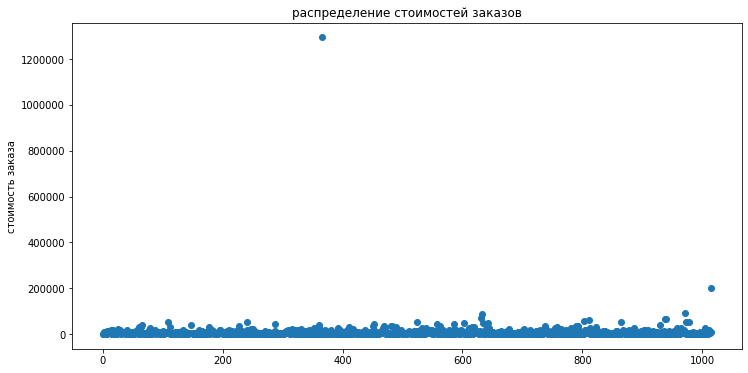

In [21]:
# определяем диапазон данных по оси x
x_values = pd.Series(range(0,len(orders['revenue'])))

# строим точечную диаграмму стоимостей заказов
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain')
plt.scatter(x_values, orders['revenue'])
plt.title('распределение стоимостей заказов')
plt.ylabel('стоимость заказа')
plt.show()

За редкими исключениями, стоимость большинства заказов не превышает 100 тысяч.

Посмотрим также на перцентили стоимости заказов.

In [22]:
# считаем 95-й и 99-й перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Перцентили показывают еще более низкие значения "нормального" порога стоимости. Возьмем больший из них за границу отсева данных на уровне 54 тысячи.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Для этого заведем параметр, обозначающий платящих пользователей (paid), и присвоим ему значения по группам A и B: 
- 1 - в количестве записей равном уникальному числу пользователей, совершивших заказ;
- 0 - в количестве записей равном числу всех пользователей за вычетом платящих.

In [23]:
# задаем параметр платящих пользователей по группам А и B
sample_a = pd.concat([pd.Series(1, index=np.arange(orders[orders['group']=='A']['visitorId'].nunique()), name='paid'), pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - orders[orders['group']=='A']['visitorId'].nunique()), name='paid')], axis=0)
sample_b = pd.concat([pd.Series(1, index=np.arange(orders[orders['group']=='B']['visitorId'].nunique()), name='paid'), pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - orders[orders['group']=='B']['visitorId'].nunique()), name='paid')], axis=0)

Теперь непосредственно посчитаем статистическую значимость различий в конверсии между группами, а также выведем относительную разницу соответствующих величин.

В этом случае нулевая гипотеза будет сформулирована, исходя из принципа равенства, а альтернативная - как противоположная нулевой:
- h0: значения конверсии в группах А и В равны;
- h1: значения конверсии в группах А и В не равны.

Критерий значимости возьмем на уровне 5%.

In [24]:
# определяем статистическую значимость различий в конверсии 
print("{0:.3f}".format(stats.ttest_ind(sample_a, sample_b, equal_var=False).pvalue))

print("{0:.3f}".format(sample_b.mean()/sample_a.mean() - 1))

0.011
0.175


Значение p-value меньше критерия значимости, хотя и не многократно. Тем не менее, на данном этапе можно говорить о том, что различие в конверсиях между группами статистически значимо, при этом в группе B конверсия примерно на 17% больше.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая и альтернативная гипотеза будут сформулированы схожим образом:
- h0: средние чеки заказов в группах А и B равны;
- h1: средние чеки заказов в группах А и B не равны.

Критерий значимости также возьмем на уровне 5%.

In [25]:
# определяем статистическую значимость различий в среднем чеке заказа
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1))

0.829
0.287


Значение p-value больше критерия значимости, поэтому, несмотря на относительный прирост среднего чека в группе B почти на 29%, такое различие нельзя считать статистически значимым.

Теперь очистим данные от аномалий. Для этого определим аномальных пользователей по ранее выбранным критериям. 

In [26]:
# выбираем пользователей с аномально большим число заказов
users_with_many_oders = orders_by_users[orders_by_users['transactionId'] > 2]['visitorId']

# выбираем пользователей с аномально большой стоимостью заказов
users_with_expansive_orders = orders[orders['revenue'] > 54000]['visitorId']

# объединяем всех аномальных пользователей без повторов
abnormal_users = pd.concat([users_with_many_oders, users_with_expansive_orders], axis=0).drop_duplicates()

abnormal_users

55       249864742
138      611059232
478     2108163459
632     2742574263
687     2988190573
890     3908431265
908     3967698036
425     1920142716
743     4133034833
744      888512513
940     4003628586
949      887908475
1099     148427295
1103    1164614297
1136    1307669133
1196    2108080724
Name: visitorId, dtype: int64

Далее оставим в таблице заказов только те заказы, которые не относятся к аномальным пользователям.

In [27]:
# оставляем заказы "нормальных" пользователей
orders = orders[~orders['visitorId'].isin(abnormal_users)]

Повторно задаем платящих пользователей по группам.

In [28]:
# задаем параметр платящих пользователей по группам А и B
sample_a = pd.concat([pd.Series(1, index=np.arange(orders[orders['group']=='A']['visitorId'].nunique()), name='paid'), pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - orders[orders['group']=='A']['visitorId'].nunique()), name='paid')], axis=0)
sample_b = pd.concat([pd.Series(1, index=np.arange(orders[orders['group']=='B']['visitorId'].nunique()), name='paid'), pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - orders[orders['group']=='B']['visitorId'].nunique()), name='paid')], axis=0)

Пересчитаем статистическую значимость различий в конверсии между группами.

Повторим формулировку гипотез:
- h0: значения конверсии в группах А и В равны;
- h1: значения конверсии в группах А и В не равны.

In [29]:
# определяем статистическую значимость различий в конверсии 
print("{0:.3f}".format(stats.ttest_ind(sample_a, sample_b, equal_var=False).pvalue))

print("{0:.3f}".format(sample_b.mean()/sample_a.mean() - 1))

0.007
0.189


В случае конверсии значение p-value стало еще меньше, а относительная разница между группами, соответственно - еще больше.

Пересчитаем статистическую значимость различий в среднем чеке заказа между группами.

Повторим формулировку гипотез:
- h0: средние чеки заказов в группах А и B равны;
- h1: средние чеки заказов в группах А и B не равны.

In [30]:
# определяем статистическую значимость различий в среднем чеке заказа
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1))

0.788
-0.032


В случае среднего чека p-value тоже снизилось, но вот величина среднего чека в группе B стала ниже уровня этого параметра в группе A, хотя такая разница по-прежнему не является статистически значимой.

# Выводы

По итогам анализа данных A/B-теста предлагается продолжить тестирование. Такое предложение объясняется несколькими факторами:

1) Хотя в части конверсии и была достигнута статистическая значимость различий между группами А и В (в пользу последней) при критерии значимости в 5%, величина p-value по "сырым" данным все же составляет более 1%, а графики кумулятивной конверсии не позволяют с уверенностью говорить о стабилизации значений по группам;

2) Аналогично, нельзя пока зафиксировать и значения кумулятивного среднего чека, что особенно явно выражено на графике относительного изменения данной величины между группами;

3) Кроме того, в данных были выявлены аномальные значения, исключение которых сделало величину среднего чека в группе B даже ниже, чем в группе А, и пусть данное различие не было подтверждено статистически, не стоит спешить с принятием результатов эксперимента, чтобы избежать возможного ущерба для бизнеса.